In [5]:
from card_wars.import_cards import get_all_cards
import pandas as pd
import os
os.chdir('../')

cards = get_all_cards()
data = [vars(card) for card in cards]

df = pd.DataFrame(data)
df

,card_id,name,description,card_text,mana_cost,base_stats,attack,health,ability,battlecry,deathrattle,race,durability,spell_type,target,damage
0,mgob000,Goblin,A small creature with a funky smell.,,1,"[2, 2, 1]",2.0,"[2, 2]",,[],[],Goblin,NaN,NaN,NaN,NaN
1,mgob001,Bobblin The Goblin,A fierce Goblin.,,3,"[4, 3, 3]",4.0,"[3, 3]",,[],[],Goblin,NaN,NaN,NaN,NaN
2,mgob002,Goblin Juggler,Watch out!,Battlecry: Deal 2 damage. Deathrattle: Deal 1 ...,2,"[3, 2, 2]",3.0,"[2, 2]",,"[{'type': 'deal_damage', 'value': 2, 'target':...","[{'type': 'deathrattle_damage', 'value': 1, 'r...",Goblin,NaN,NaN,NaN,NaN
3,mgob003,Prince Gobb,,Battlecry: Give all friendly Goblin [+2/+2].,5,"[5, 5, 5]",5.0,"[5, 5]",,"[{'type': 'aoe', 'effect': 'buff', 'value': [2...",[],Goblin,NaN,NaN,NaN,NaN
4,mgob004,Goblin Gambler,,Battlecry: Draw a card.,1,"[1, 1, 1]",1.0,"[1, 1]",,"[{'type': 'draw', 'value': 1}]",[],Goblin,NaN,NaN,NaN,NaN
5,mgob005,Goblin Necromancer,,Deathrattle: Summon a 2/2 Goblin.,2,"[2, 2, 2]",2.0,"[2, 2]",,[],"[{'type': 'summon', 'card_id': 'mgob000'}]",Goblin,NaN,NaN,NaN,NaN
6,mgob005,Goblin Shaman,,Battlecry: Restore 2 health to all friendly ch...,2,"[2, 2, 2]",2.0,"[2, 2]",,"[{'type': 'aoe', 'effect': 'healing', 'value':...",[],Goblin,NaN,NaN,NaN,NaN
7,mgob006,Goblin Wingman,,Battlecry: Add a random Goblin to your hand.,3,"[3, 2, 3]",3.0,"[2, 2]",,"[{'type': 'generate_card', 'target': 'random_s...",[],Goblin,NaN,NaN,NaN,NaN
8,mgno000,Gnome,A tiny fuckwit.,,1,"[1, 1, 1]",1.0,"[1, 1]",,[],[],Gnome,NaN,NaN,NaN,NaN
9,mgno001,Grandma Gnome,,Divine Shield,2,"[2, 1, 2]",2.0,"[1, 1]",[divine_shield],[],[],Gnome,NaN,NaN,NaN,NaN


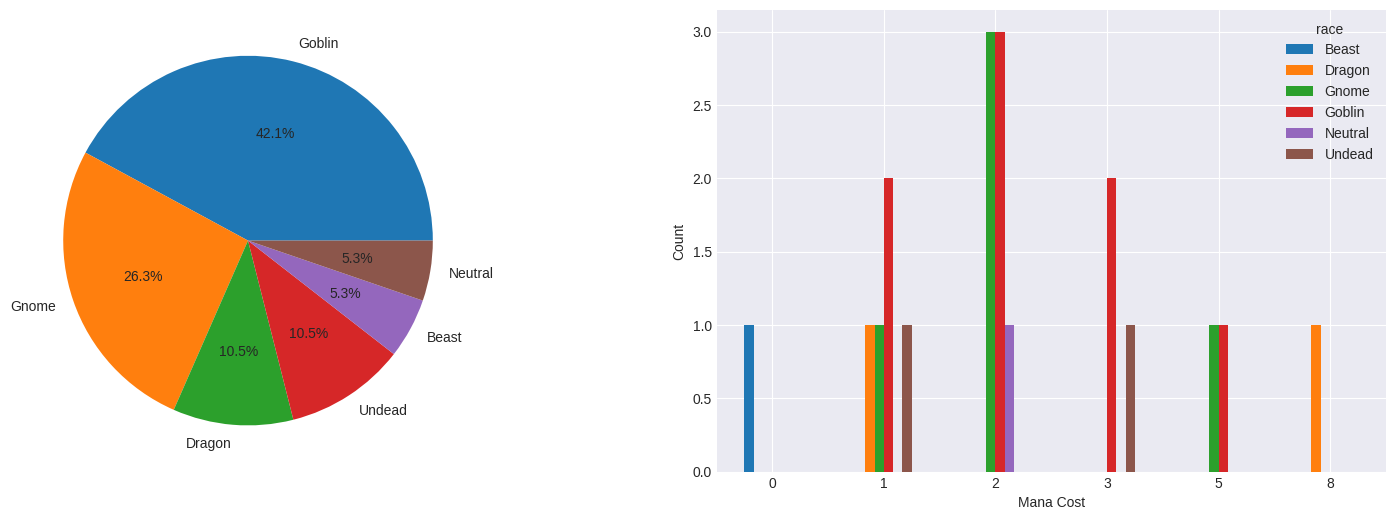

In [6]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

filtered_df = df[df['card_id'].str[0] == 'm']
sorted_df = filtered_df.sort_values('race')
race_counts = sorted_df['race'].value_counts()

plt.figure(figsize=(19, 6))
plt.subplot(1, 2, 1)
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')

grouped_df = sorted_df.groupby(['race', 'mana_cost']).size().unstack()
grouped_df.T.plot(kind='bar', ax=plt.subplot(1, 2, 2))
plt.xlabel('Mana Cost')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [7]:
#  TODO: All races: No 4, 6 or 8 cost minions at all, oops. Add more midrange drops, add more expensive drops.

#  TODO: Add more Gnomes <2 or >2, should be equal len of Goblins
#  TODO: Add more Beasts, Undeads.